In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msno


In [18]:
#configurar estilo de visualizaciones 
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline

In [5]:
df = pd.read_csv('top_anime_dataset_v2.csv')
df.head()

,anime_id,anime_url,image_url,name,english_name,japanese_names,score,genres,themes,demographics,...,producers,studios,source,duration,rating,rank,popularity,favorites,scored_by,members
0,52991,https://myanimelist.net/anime/52991/Sousou_no_...,https://cdn.myanimelist.net/images/anime/1015/...,Sousou no Frieren,Frieren: Beyond Journey's End,葬送のフリーレン,9.31,"Adventure, Drama, Fantasy",NaN,Shounen,...,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",Madhouse,Manga,24 min per ep,PG-13 - Teens 13 or older,1.0,160,63387,605478,1038347
1,5114,https://myanimelist.net/anime/5114/Fullmetal_A...,https://cdn.myanimelist.net/images/anime/1208/...,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,9.10,"Action, Adventure, Drama, Fantasy",Military,Shounen,...,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24 min per ep,R - 17+ (violence & profanity),2.0,3,232007,2196965,3484360
2,9253,https://myanimelist.net/anime/9253/Steins_Gate,https://cdn.myanimelist.net/images/anime/1935/...,Steins;Gate,Steins;Gate,STEINS;GATE,9.07,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,...,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24 min per ep,PG-13 - Teens 13 or older,3.0,14,194580,1450481,2669303
3,60022,https://myanimelist.net/anime/60022/One_Piece_...,https://cdn.myanimelist.net/images/anime/1455/...,One Piece Fan Letter,NaN,ONE PIECE FAN LETTER,9.06,"Action, Adventure, Fantasy",NaN,Shounen,...,NaN,Toei Animation,Light novel,24 min,PG-13 - Teens 13 or older,4.0,2334,1976,69555,92128
4,38524,https://myanimelist.net/anime/38524/Shingeki_n...,https://cdn.myanimelist.net/images/anime/1517/...,Shingeki no Kyojin Season 3 Part 2,Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,9.05,"Action, Drama, Suspense","Gore, Military, Survival",Shounen,...,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23 min per ep,R - 17+ (violence & profanity),5.0,21,60535,1671960,2409440


In [6]:
#informacion sobre tipos de datos y valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8358 non-null   object 
 5   japanese_names  14954 non-null  object 
 6   score           15000 non-null  float64
 7   genres          13399 non-null  object 
 8   themes          9923 non-null   object 
 9   demographics    4408 non-null   object 
 10  synopsis        14532 non-null  object 
 11  type            14999 non-null  object 
 12  episodes        14888 non-null  float64
 13  premiered       4684 non-null   object 
 14  producers       9571 non-null   object 
 15  studios         12621 non-null  object 
 16  source          15000 non-null  object 
 17  duration        15000 non-null 

In [7]:
#estadisticas descriptivas basicas 
df.describe()

,anime_id,score,episodes,rank,popularity,favorites,scored_by,members
count,15000.000000,15000.000000,14888.000000,11920.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04
mean,25738.923000,6.673692,12.653546,5947.145302,8492.495600,803.692000,3.588572e+04,7.025274e+04
std,19324.437734,0.703494,50.295837,3434.731901,5485.410907,6106.092961,1.321802e+05,2.205379e+05
min,1.000000,5.570000,1.000000,1.000000,1.000000,0.000000,1.020000e+02,1.810000e+02
25%,5852.750000,6.110000,1.000000,2968.750000,3855.750000,2.000000,5.270000e+02,1.598000e+03
50%,27827.000000,6.580000,2.000000,5945.500000,7916.500000,11.000000,2.492000e+03,6.761500e+03
75%,40838.250000,7.170000,12.000000,8917.000000,12583.250000,92.250000,1.531350e+04,3.789700e+04
max,61134.000000,9.310000,3057.000000,11909.000000,21869.000000,234514.000000,2.906007e+06,4.117781e+06


In [8]:
#identificar dimensiones del dataset
print(f"el dataset tiene {df.shape[0]}filas y {df.shape[1]}columnas")

el dataset tiene 15000filas y 24columnas


In [9]:
#cantidades de valores nulos por columna
df.isnull().sum()

anime_id              0
anime_url             0
image_url             0
name                  0
english_name       6642
japanese_names       46
score                 0
genres             1601
themes             5077
demographics      10592
synopsis            468
type                  1
episodes            112
premiered         10316
producers          5429
studios            2379
source                0
duration              0
rating               68
rank               3080
popularity            0
favorites             0
scored_by             0
members               0
dtype: int64

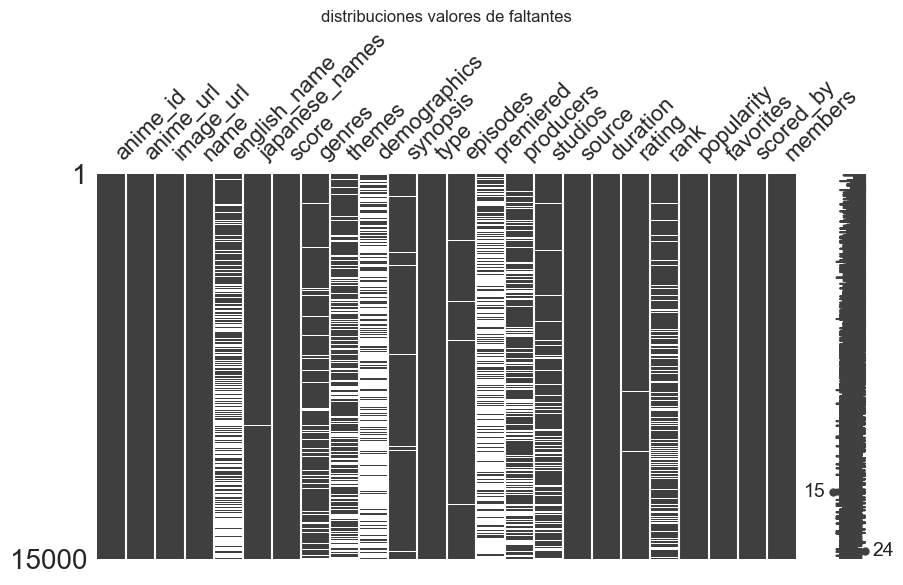

In [10]:
#visualizacion de valores faltantes
msno.matrix(df , figsize=(10,5))
plt.title('distribuciones valores de faltantes')
plt.show()

In [11]:
#porcentaje de valores faltantes
missing_percent = df.isnull().sum() /len(df) * 100
print(missing_percent)

anime_id           0.000000
anime_url          0.000000
image_url          0.000000
name               0.000000
english_name      44.280000
japanese_names     0.306667
score              0.000000
genres            10.673333
themes            33.846667
demographics      70.613333
synopsis           3.120000
type               0.006667
episodes           0.746667
premiered         68.773333
producers         36.193333
studios           15.860000
source             0.000000
duration           0.000000
rating             0.453333
rank              20.533333
popularity         0.000000
favorites          0.000000
scored_by          0.000000
members            0.000000
dtype: float64


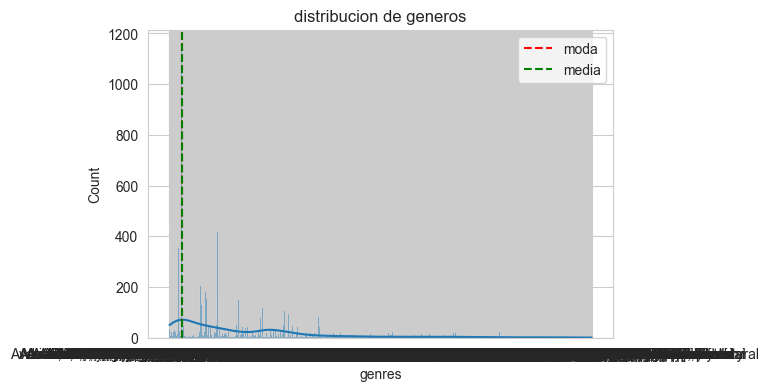

In [12]:
sns.histplot(df['genres'], bins=30, kde=True)
plt.title('distribucion de generos')
plt.axvline(df['genres'].mode()[0], color='red', linestyle='--', label='moda')
plt.axvline(df['genres'].mode()[0], color='green', linestyle='--',label='media')
plt.legend()
plt.show()
 

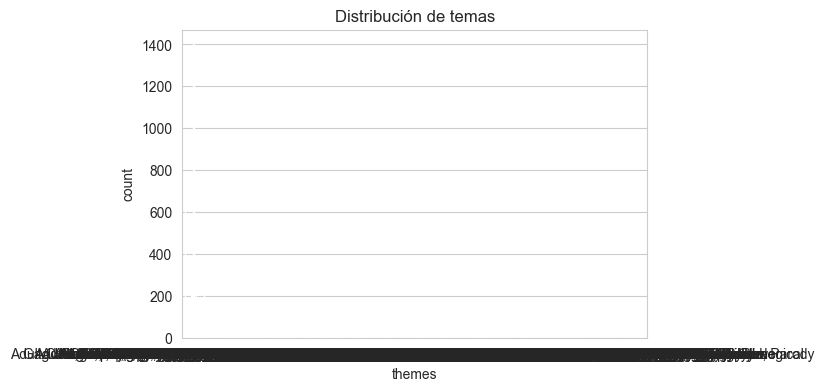

In [13]:
sns.countplot(x="themes", data=df)
plt.title("Distribución de temas")
plt.show()

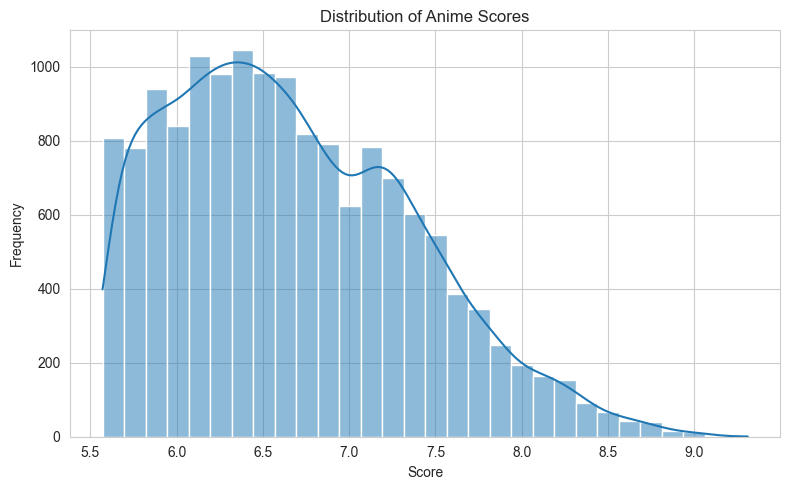

In [14]:
# Histogram: Distribution of Anime Scores
plt.figure(figsize=(8, 5))
sns.histplot(df['score'].dropna(), kde=True, bins=30)
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


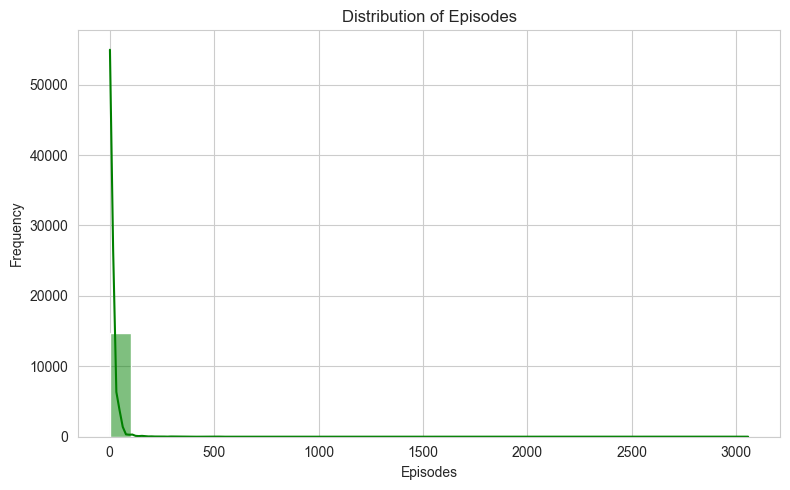

In [15]:
# Histogram: Distribution of the number of Episodes (where available)
plt.figure(figsize=(8, 5))
sns.histplot(df['episodes'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Episodes')
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

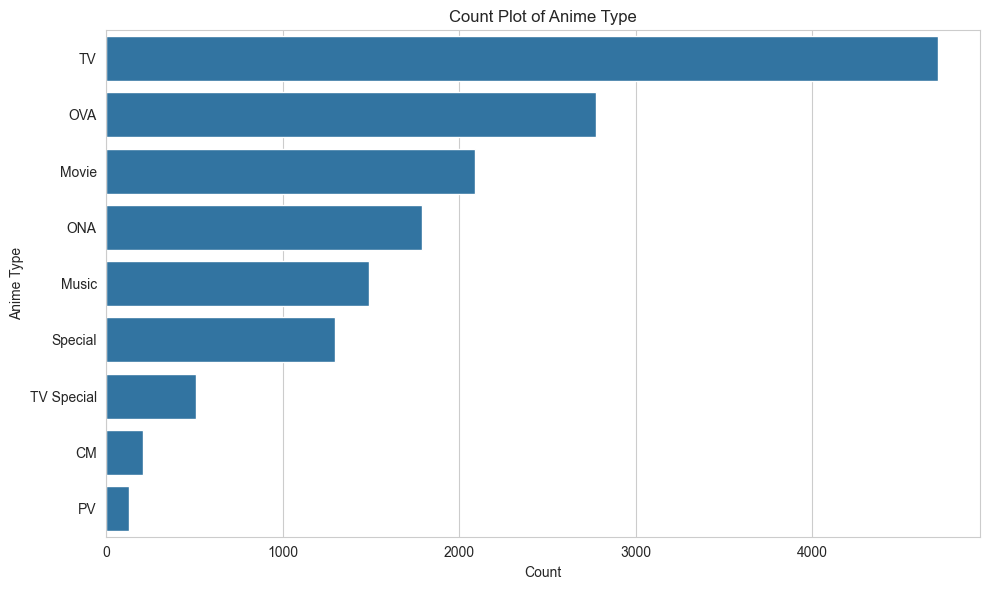

In [16]:
# Count Plot: Distribution of 'type' (e.g., TV, OVA, Movie)
plt.figure(figsize=(10, 6))
sns.countplot(y='type', data=df, order=df['type'].value_counts().index)
plt.title('Count Plot of Anime Type')
plt.xlabel('Count')
plt.ylabel('Anime Type')
plt.tight_layout()
plt.show()


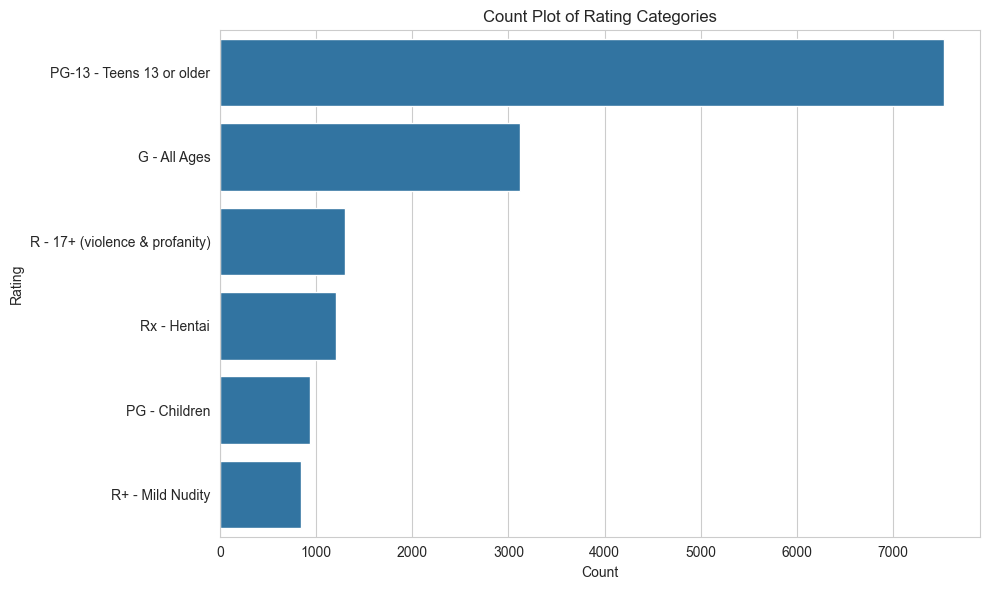

In [17]:
# Count Plot: Distribution of 'rating' categories
plt.figure(figsize=(10, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Count Plot of Rating Categories')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()
